<a href="https://colab.research.google.com/github/Khambounma/phantichdulieu/blob/main/lab07.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np

In [2]:
import matplotlib.pyplot as plt

In [5]:
from keras.preprocessing.image import img_to_array

In [7]:
from keras.preprocessing.image import load_img

In [8]:
import random
import os

In [9]:
from keras.datasets import mnist
from keras.models import load_model
from matplotlib import image

In [10]:
from keras.models import Sequential
from keras.utils import np_utils
from keras.layers.core import Dense,Activation
(x_train,y_train),(x_test,y_test)=mnist.load_data()

11501568/11490434 [==============================] - 0s 0us/step


In [12]:
def load_image(filename):
  img = load_img(filename, grayscale=True, target_size=(28, 28))
  img=img_to_array(img)
  img=img.reshape(1,784)
  img=img.astype('float32')
  img=img/255.0
  return img


In [13]:
print("x_train shape",x_train.shape)

x_train shape (60000, 28, 28)


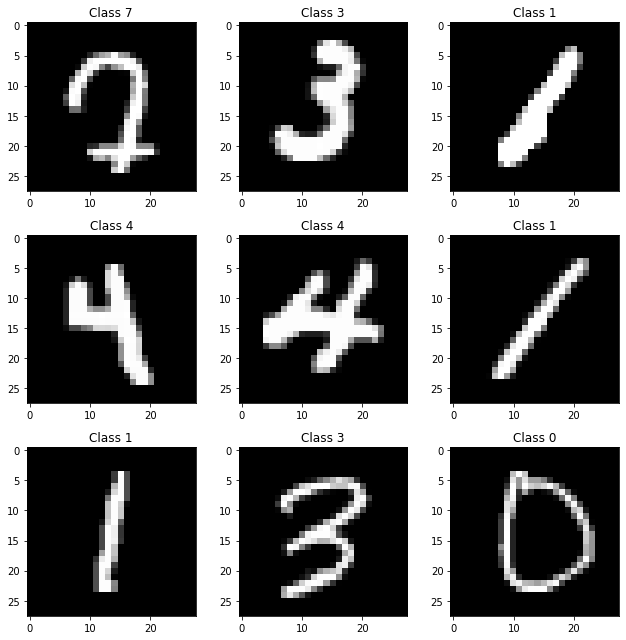

In [14]:
plt.rcParams['figure.figsize']=(9,9)
for i in range(9):
  plt.subplot(3,3,i+1)
  num=random.randint(0,len(x_train))
  plt.imshow(x_train[num],cmap='gray',interpolation=None)
  plt.title('Class {}'.format(y_train[num]))
plt.tight_layout()

In [15]:
x_train=x_train.reshape(60000,784)
x_train=x_train.astype('float32')
x_train/=255
x_test=x_test.reshape(10000,784)
x_test=x_test.astype('float32')
x_test/=255

In [16]:
nb_class=10
y_train=np_utils.to_categorical(y_train,nb_class)
y_test=np_utils.to_categorical(y_test,nb_class)
model= Sequential()
model.add(Dense(10,input_shape=(784,)))
model.add(Activation('relu'))
model.add(Dense(40))
model.add(Activation('relu'))
model.add(Dense(10))
model.add(Activation('softmax'))
model.summary()
model.compile(loss='categorical_crossentropy',optimizer='rmsprop',metrics=['accuracy'])
#mỗi lần lấy 128 tấm ảnh để train
history=model.fit (x_train, y_train, batch_size = 128, epochs = 5,verbose = 2,validation_data = ( x_test, y_test ))
#model.fit(x_train,y_train,batch_size=128,epochs=5)
save_dir = "/ results /"
model_name = 'keras_mnist.h5'
model_path = os.path.join(save_dir, model_name)
model.save (model_path)
print( 'Saved trained model at %s ' % model_path )

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 10)                7850      
                                                                 
 activation (Activation)     (None, 10)                0         
                                                                 
 dense_1 (Dense)             (None, 40)                440       
                                                                 
 activation_1 (Activation)   (None, 40)                0         
                                                                 
 dense_2 (Dense)             (None, 10)                410       
                                                                 
 activation_2 (Activation)   (None, 10)                0         
                                                                 
Total params: 8,700
Trainable params: 8,700
Non-trainabl

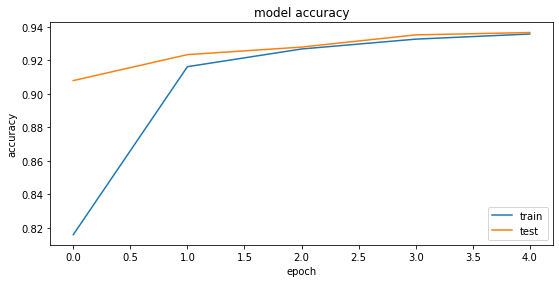

In [17]:
fig = plt.figure ()
plt.subplot( 2,1,1 )
plt.plot(history.history['accuracy'])
plt.plot (history.history['val_accuracy'])
plt.title ('model accuracy')
plt.ylabel ('accuracy')
plt.xlabel ('epoch')
plt.legend (['train', 'test'], loc='lower right')

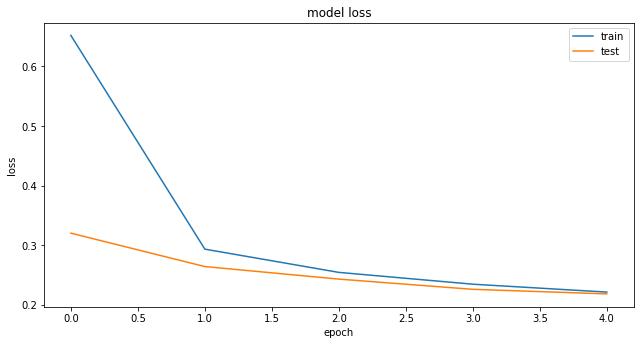

In [18]:
plt.subplot (2,1,2)
plt.plot( history.history ['loss'])
plt.plot( history.history['val_loss'])
plt.title('model loss' )
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train','test'],loc='upper right')
plt.tight_layout ()

In [19]:
mnist_model = load_model(model_path)
loss_and_metrics = mnist_model.evaluate( x_test, y_test, verbose = 2 )
print( "Test Loss" , loss_and_metrics [0])
print( "Test Accuracy" , loss_and_metrics[1])

313/313 - 1s - loss: 0.2183 - accuracy: 0.9367 - 778ms/epoch - 2ms/step
Test Loss 0.21825094521045685
Test Accuracy 0.9366999864578247


In [24]:
image_test = load_image('so2.jpg')

/usr/local/lib/python3.7/dist-packages/keras_preprocessing/image/utils.py:107: UserWarning: grayscale is deprecated. Please use color_mode = "grayscale"
  warnings.warn('grayscale is deprecated. Please use '


In [25]:
digit = mnist_model.predict(image_test)
print('Du bao day la so:',digit[0].argmax())

Du bao day la so: 2


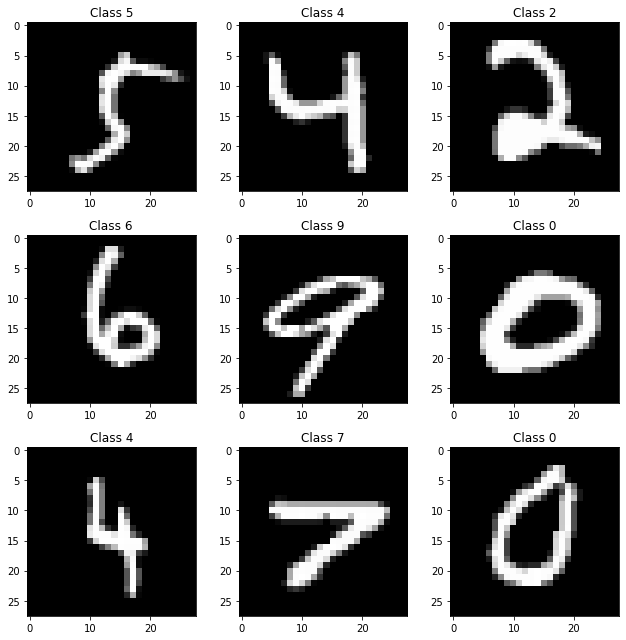

In [26]:
predicted_classes=mnist_model.predict(x_test)

plt.rcParams['figure.figsize']=(9,9)
for i in range(9):
  plt.subplot(3,3,i+1)
  num=random.randint(0,len(x_test))
  plt.imshow(x_test[num].reshape(28,28),cmap='gray',interpolation=None)
  plt.title('Class {}'.format(predicted_classes[num].argmax()))
plt.tight_layout()